In [4]:
imgs = []
labels = []

all_img_paths = glob.glob('/home/jia/Desktop/traffic_sign_keras1.2/FullIJCNN2013/*.ppm')
#打乱图片路径顺序
np.random.shuffle(all_img_paths)
for img_path in all_img_paths:
    try:
        img = io.imread(img_path)          
        # io.imread 读入的数据是 uint8
        imgs.append(img)
        label = get_class(img_path)
        labels.append(label)

        if len(imgs)%100 == 0: print("Processed {}/{}".format(len(imgs), len(all_img_paths)))
    except (IOError, OSError):
        print('missed', img_path)
        pass

# Load ground truth data

In [5]:
with open('/home/jia/Desktop/raffic_sign_keras1.2/FullIJCNN2013/gt.txt', 'r') as f:
    gt = []
    for line1 in f:
        line = line1.replace('.ppm', '').strip('\n')  # 去掉不需要的字符， 将每一行元素进行split
        name, x1, y1, x2, y2, class_id = line.split(';')
        x1 = int(x1)
        y1 = int(y1)
        x2 = int(x2)
        y2 = int(y2)
        gt.append({'name': name, 'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2, 'class_id': class_id})

IOError: [Errno 2] No such file or directory: '/home/jia/Desktop/CS231N_AND_traffic_sign_keras1.2/FullIJCNN2013/gt.txt'

In [4]:
with open('/home/jia/Desktop/data/imgs/gt.txt', 'r') as f:
    lines = f.readlines()
for i in range(len(lines)):
    lines[i] = lines[i].strip('\n')  # 去掉不需要的字符， 将每一行元素进行split
    name, x1, y1, x2, y2, class_id = lines[i].split(';')
    lines[i] = 'data/imgs/' + name + ';' + x1 + ';' + y1+';'+x2+';'+y2+';'+'traffic_sign' + '\n'
with open('/home/jia/Desktop/keras-frcnn-master/data/my_data.txt', 'w') as f:
    f.writelines(lines)

In [2]:
with open('/home/jia/Desktop/data/my_data.txt', 'r') as f:
    lines = f.readlines()

# Show An Example

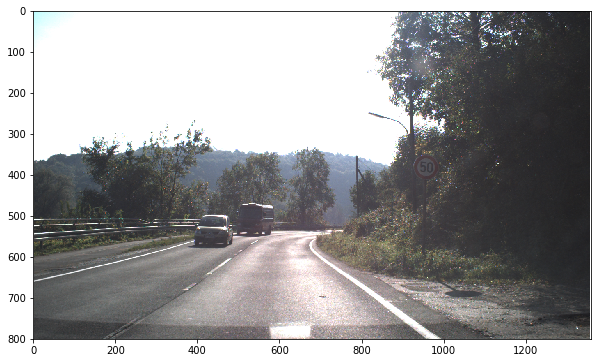

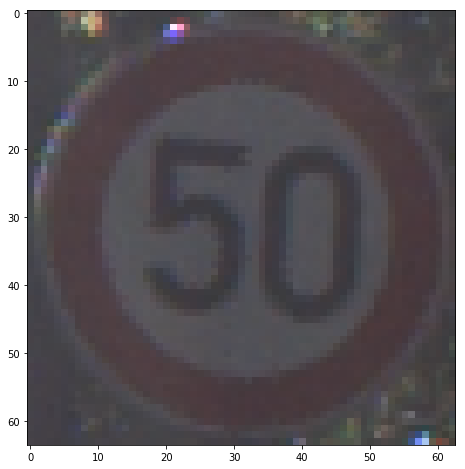

In [101]:
show_num = '00006'
for i in range(len(labels)):
    if labels[i] == show_num:
        x_indx = i
        
y_indx = []  # 一个场景中可能有多个交通标志
for i in xrange(1213):
    if gt[i]['name'] == show_num:
        y_indx.append(i)
        
x1 = gt[y_indx[0]]['x1']
x2 = gt[y_indx[0]]['x2']
y1 = gt[y_indx[0]]['y1']
y2 = gt[y_indx[0]]['y2']



plt.figure(1)
plt.imshow(imgs[x_indx].astype('uint8'))
plt.figure(2)
plt.imshow(imgs[x_indx][y1: y2, x1: x2, :].astype('uint8'))
plt.show()

In [98]:
y_indx

[19]